In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nt = 10001
nx = 51

s = 0.1
T = 2
L = 1
dx = L/(nx-1)
dt = T/(nt-1)


x = numpy.linspace(0, L, nx)

u = numpy.zeros(nx)

In [3]:
def fxt(x,t):
    
    fxt = numpy.exp(t) * numpy.cos(x) + \
          numpy.exp(t) * numpy.sin(t) + \
          numpy.exp(2*t - s) * numpy.sin(x)**2
    return fxt

In [4]:
def func_u(u, x, nt, dt, dx,s):
    
    un = numpy.zeros_like(u)
    unt = numpy.zeros((nt+1,nx))
    
    i = 0
    
    for n in range(nt):
        
        tn = i-int(s/dt)
        un = u.copy()
        u[1:-1] = un[1:-1] + \
                  dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) -\
                  dt/dx*(un[2:] - un[1:-1]) + \
                  dt*un[1:-1] * (1-unt[tn,1:-1]) + dt*fxt(x,dt*i)[1:-1]
                               
        u[0] = 0
        u[-1] = numpy.exp(dt*i)*numpy.sin(L)
        unt[i,:] = u[:]
        i = i+1

        
    return u

In [5]:
u_num = func_u(u, x, nt, dt, dx,s)
u_exact = numpy.exp(T)*numpy.sin(x)

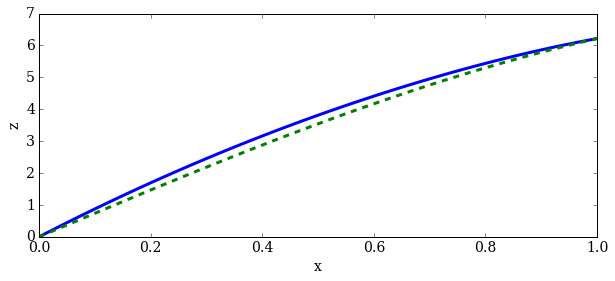

In [6]:
pyplot.figure(figsize=(10,4))
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('x', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(x, u_num, ls='-', lw=3)
pyplot.plot(x, u_exact, ls='--', lw=3)
#pyplot.legend(['Numerical Solution','Analytical Solution']);

In [7]:
numpy.max(u_num-u_exact)

0.28417109324189704